# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import os
import scipy.stats as st
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

615

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).

> **HINT:** The OpenWeatherMap API only allows 60 calls per minute under their free plan. Try using `time.sleep(60)` after each set of 50 cities to avoid API errors due to large calls.

In [3]:
#Build URL
url = "http://api.openweathermap.org/data/2.5/weather?"

#start log
print('Beginning Data Retrieval')
print('-----------------------------')

#create placeholder for used data
cities_list = []
lat_list = []
lon_list = []
max_temp_list = []
humid_list = []
cloud_list = []
wind_list = []
country_list = []
date_list = []

#check weather in each city
count = 0 #used for index checking and to prevent overusage of free plan API
set_count = 1
record_count = 1

for city in cities:
    print(f'Processing Record {record_count} of Set {set_count} | {city}')
    
    #query the city and extract data
    try:
        query_url = f'{url}q={city}&appid={weather_api_key}'
        response_json = requests.get(query_url).json()
        
        #add the data to the lists
        cities_list.append(city)
        lat_list.append(response_json['coord']['lat'])
        lon_list.append(response_json['coord']['lon'])
        
        #Temperature needs to be converted to Fahrenheit from Kelvin
        max_temp = response_json['main']['temp_max']
        max_temp = (max_temp - 273.15) * (9/5) + 32
        max_temp_list.append(max_temp)
        
        humid_list.append(response_json['main']['humidity'])
        cloud_list.append(response_json['clouds']['all'])
        wind_list.append(response_json['wind']['speed'])
        country_list.append(response_json['sys']['country'])
        date_list.append(response_json['dt'])
    except: #add zeroes for easy cleanup
        print(f'{city} was not successsfully processed')
        lat_list.append(0)
        lon_list.append(0)
        max_temp_list.append(0)
        humid_list.append(0)
        cloud_list.append(0)
        wind_list.append(0)
        country_list.append(0)
        date_list.append(0)    
    
    #check indexes and prevent API abuse
    record_count = record_count + 1
    count = count + 1
    if count % 50 == 0:
        time.sleep(60)
        set_count = set_count + 1
        record_count = 1
        

Beginning Data Retrieval
-----------------------------
Processing Record 1 of Set 1 | innisfail
Processing Record 2 of Set 1 | sumbawa
sumbawa was not successsfully processed
Processing Record 3 of Set 1 | punta arenas
Processing Record 4 of Set 1 | qaanaaq
Processing Record 5 of Set 1 | cape town
Processing Record 6 of Set 1 | quatre cocos
Processing Record 7 of Set 1 | klaksvik
Processing Record 8 of Set 1 | tual
Processing Record 9 of Set 1 | mataura
Processing Record 10 of Set 1 | busselton
Processing Record 11 of Set 1 | rikitea
Processing Record 12 of Set 1 | bredasdorp
Processing Record 13 of Set 1 | yellowknife
Processing Record 14 of Set 1 | ures
Processing Record 15 of Set 1 | sao joao da barra
Processing Record 16 of Set 1 | tuktoyaktuk
Processing Record 17 of Set 1 | ilulissat
Processing Record 18 of Set 1 | tougue
Processing Record 19 of Set 1 | tsihombe
tsihombe was not successsfully processed
Processing Record 20 of Set 1 | albany
Processing Record 21 of Set 1 | vao
Proc

Processing Record 35 of Set 4 | oranjemund
Processing Record 36 of Set 4 | talesh
talesh was not successsfully processed
Processing Record 37 of Set 4 | lasa
Processing Record 38 of Set 4 | kloulklubed
Processing Record 39 of Set 4 | martapura
Processing Record 40 of Set 4 | sao pedro do sul
Processing Record 41 of Set 4 | coos bay
Processing Record 42 of Set 4 | tasbuget
tasbuget was not successsfully processed
Processing Record 43 of Set 4 | norman wells
Processing Record 44 of Set 4 | haibowan
haibowan was not successsfully processed
Processing Record 45 of Set 4 | zhangzhou
Processing Record 46 of Set 4 | vaini
Processing Record 47 of Set 4 | vila do maio
Processing Record 48 of Set 4 | mamallapuram
Processing Record 49 of Set 4 | mecca
Processing Record 50 of Set 4 | hervey bay
Processing Record 1 of Set 5 | boa vista
Processing Record 2 of Set 5 | rawson
Processing Record 3 of Set 5 | kuusamo
Processing Record 4 of Set 5 | bubaque
Processing Record 5 of Set 5 | leskovac
Processin

Processing Record 18 of Set 8 | saint-pierre
Processing Record 19 of Set 8 | bilma
Processing Record 20 of Set 8 | hay river
Processing Record 21 of Set 8 | ushtobe
Processing Record 22 of Set 8 | amderma
amderma was not successsfully processed
Processing Record 23 of Set 8 | mongo
Processing Record 24 of Set 8 | benguela
Processing Record 25 of Set 8 | minab
Processing Record 26 of Set 8 | kirakira
Processing Record 27 of Set 8 | bud
Processing Record 28 of Set 8 | nioro
Processing Record 29 of Set 8 | redding
Processing Record 30 of Set 8 | warqla
warqla was not successsfully processed
Processing Record 31 of Set 8 | chimbote
Processing Record 32 of Set 8 | kilindoni
Processing Record 33 of Set 8 | fare
Processing Record 34 of Set 8 | pangnirtung
Processing Record 35 of Set 8 | the valley
Processing Record 36 of Set 8 | evensk
Processing Record 37 of Set 8 | hanumangarh
Processing Record 38 of Set 8 | autun
Processing Record 39 of Set 8 | dingle
Processing Record 40 of Set 8 | genera

Processing Record 49 of Set 11 | grand gaube
Processing Record 50 of Set 11 | belmonte
Processing Record 1 of Set 12 | nadym
Processing Record 2 of Set 12 | healdsburg
Processing Record 3 of Set 12 | arcata
Processing Record 4 of Set 12 | nizhnevartovsk
Processing Record 5 of Set 12 | iquitos
Processing Record 6 of Set 12 | aflu
aflu was not successsfully processed
Processing Record 7 of Set 12 | blagoyevo
Processing Record 8 of Set 12 | mayo
Processing Record 9 of Set 12 | amalapuram
Processing Record 10 of Set 12 | havoysund
Processing Record 11 of Set 12 | kumluca
Processing Record 12 of Set 12 | opotiki
Processing Record 13 of Set 12 | brandon
Processing Record 14 of Set 12 | aitape
Processing Record 15 of Set 12 | san andres
Processing Record 16 of Set 12 | livingstone
Processing Record 17 of Set 12 | baracoa
Processing Record 18 of Set 12 | lazaro cardenas
Processing Record 19 of Set 12 | ugoofaaru
Processing Record 20 of Set 12 | deori khas
Processing Record 21 of Set 12 | formo

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [4]:
#Convert the collected data into a dataframe
compiled_df = pd.DataFrame(
    {
        'City': cities_list,
        'Lat': lat_list,
        'Lon': lon_list,
        'Max Temp': max_temp_list,
        'Humidity': humid_list,
        'Cloudiness': cloud_list,
        'Wind Speed': wind_list,
        'Country': country_list,
        'Date': date_list
    }
)
cleaned_df = compiled_df.loc[compiled_df['Country'] != 0]

#Create csv
output_path = os.path.join(os.path.abspath(''), "Weather_Data_Raw.csv")
cleaned_df.to_csv(output_path)

#Display the Dataframe
cleaned_df.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,innisfail,-17.5333,146.0333,90.212,72,50,2.45,AU,1645489748
2,punta arenas,-53.1500,-70.9167,62.708,51,20,7.20,CL,1645489748
3,qaanaaq,77.4840,-69.3632,-7.024,57,78,4.08,GL,1645489749
4,cape town,-33.9258,18.4232,64.274,76,0,3.09,ZA,1645489728
5,quatre cocos,-20.2078,57.7625,80.096,89,78,7.63,MU,1645489749


In [5]:
cleaned_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.023826,19.822250,51.413160,74.310284,61.748227,3.938599,1.645490e+09
std,32.988214,90.455743,29.195253,19.568920,40.046870,2.931201,2.790249e+02
min,-54.800000,-179.166700,-43.888000,8.000000,0.000000,0.000000,1.645489e+09
25%,-7.862000,-60.015925,33.831500,65.000000,20.000000,1.760000,1.645490e+09
50%,24.349350,25.676700,59.648000,78.500000,75.000000,3.185000,1.645490e+09
75%,45.629175,100.002625,75.618500,89.250000,100.000000,5.360000,1.645490e+09
max,78.218600,179.316700,91.112000,100.000000,100.000000,23.220000,1.645491e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [6]:
drop_humid_df = cleaned_df.loc[cleaned_df['Humidity'] <= 100]
drop_humid_df.describe()

,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Date
count,564.000000,564.000000,564.000000,564.000000,564.000000,564.000000,5.640000e+02
mean,20.023826,19.822250,51.413160,74.310284,61.748227,3.938599,1.645490e+09
std,32.988214,90.455743,29.195253,19.568920,40.046870,2.931201,2.790249e+02
min,-54.800000,-179.166700,-43.888000,8.000000,0.000000,0.000000,1.645489e+09
25%,-7.862000,-60.015925,33.831500,65.000000,20.000000,1.760000,1.645490e+09
50%,24.349350,25.676700,59.648000,78.500000,75.000000,3.185000,1.645490e+09
75%,45.629175,100.002625,75.618500,89.250000,100.000000,5.360000,1.645490e+09
max,78.218600,179.316700,91.112000,100.000000,100.000000,23.220000,1.645491e+09


In [7]:
#  Get the indices of cities that have humidity over 100%.
humid_df_list = cleaned_df.loc[cleaned_df['Humidity'] > 100].index
humid_df_list

Int64Index([], dtype='int64')

In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
clean_city_data = cleaned_df.loc[cleaned_df['Humidity'] <= 100]
clean_city_data.head()

,City,Lat,Lon,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,innisfail,-17.5333,146.0333,90.212,72,50,2.45,AU,1645489748
2,punta arenas,-53.1500,-70.9167,62.708,51,20,7.20,CL,1645489748
3,qaanaaq,77.4840,-69.3632,-7.024,57,78,4.08,GL,1645489749
4,cape town,-33.9258,18.4232,64.274,76,0,3.09,ZA,1645489728
5,quatre cocos,-20.2078,57.7625,80.096,89,78,7.63,MU,1645489749


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

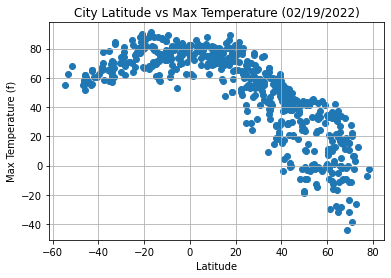

In [9]:
lat_x = clean_city_data['Lat']
maxtemp_y = clean_city_data['Max Temp']

plt.scatter(lat_x,maxtemp_y)
plt.title('City Latitude vs Max Temperature (02/19/2022)')
plt.xlabel('Latitude')
plt.ylabel('Max Temperature (f)')
plt.grid()
plt.show()

## Latitude vs. Humidity Plot

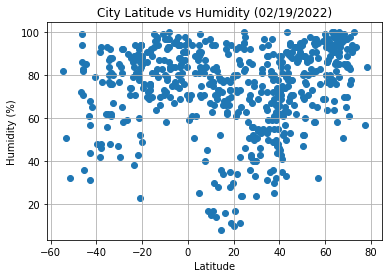

In [10]:
lat_x = clean_city_data['Lat']
humid_y = clean_city_data['Humidity']

plt.scatter(lat_x,humid_y)
plt.title('City Latitude vs Humidity (02/19/2022)')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%)')
plt.grid()
plt.show()

## Latitude vs. Cloudiness Plot

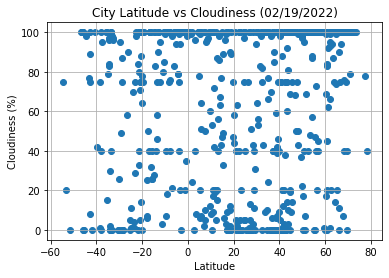

In [11]:
lat_x = clean_city_data['Lat']
cloud_y = clean_city_data['Cloudiness']

plt.scatter(lat_x,cloud_y)
plt.title('City Latitude vs Cloudiness (02/19/2022)')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%)')
plt.grid()
plt.show()

## Latitude vs. Wind Speed Plot

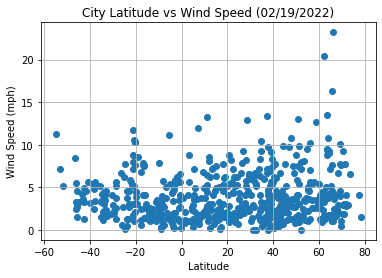

In [12]:
lat_x = clean_city_data['Lat']
wind_y = clean_city_data['Wind Speed']

plt.scatter(lat_x,wind_y)
plt.title('City Latitude vs Wind Speed (02/19/2022)')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed (mph)')
plt.grid()
plt.show()

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: -0.8406423216821177


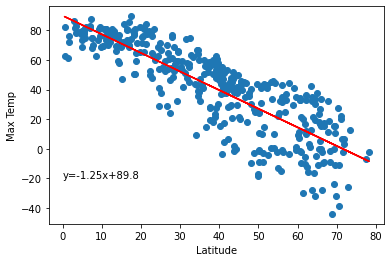

In [24]:
#Create dataframe for northern hemisphere
north_df = clean_city_data.loc[clean_city_data['Lat'] > 0]

#Get x,y scatterplot lists
lat_x = north_df['Lat']
maxtemp_y = north_df['Max Temp']

#build regression line
slope, y_int, rval, pval, std_err = st.linregress(lat_x,maxtemp_y)

#Best fit line equation
fit = slope * north_df['Lat'] + y_int
line_eq = f'y={round(slope,2)}x+{round(y_int,2)}'

#print the r-value
print(f'The r-value is: {rval}')

#plot the line
plt.scatter(lat_x,maxtemp_y)
plt.plot(north_df['Lat'],fit,'r-')
plt.annotate(f'{line_eq}', xy=(0,-20))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is: 0.5314539806313293


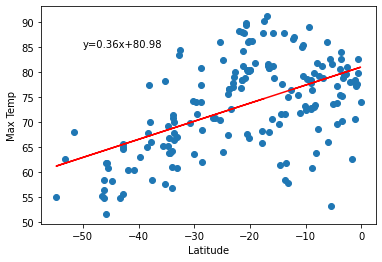

In [25]:
#Create dataframe for southern hemisphere
south_df = clean_city_data.loc[clean_city_data['Lat'] < 0]

#Get x,y scatterplot lists
lat_x = south_df['Lat']
maxtemp_y = south_df['Max Temp']

#build regression line
slope, y_int, rval, pval, std_err = st.linregress(lat_x,maxtemp_y)

#Best fit line equation
fit = slope * south_df['Lat'] + y_int
line_eq = f'y={round(slope,2)}x+{round(y_int,2)}'

#print the r-value
print(f'The r-value is: {rval}')

#plot the line
plt.scatter(lat_x,maxtemp_y)
plt.plot(south_df['Lat'],fit,'r-')
plt.annotate(f'{line_eq}', xy=(-50,85))
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3418086128617854


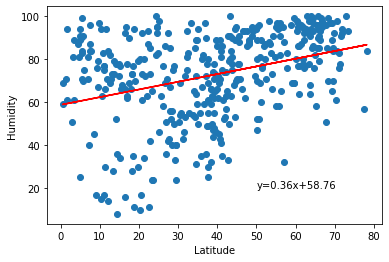

In [26]:
#Get x,y scatterplot lists
lat_x = north_df['Lat']
humidity_y = north_df['Humidity']

#build regression line
slope, y_int, rval, pval, std_err = st.linregress(lat_x,humidity_y)

#Best fit line equation
fit = slope * north_df['Lat'] + y_int
line_eq = f'y={round(slope,2)}x+{round(y_int,2)}'

#print the r-value
print(f'The r-value is: {rval}')

#plot the line
plt.scatter(lat_x,humidity_y)
plt.plot(north_df['Lat'],fit,'r-')
plt.annotate(f'{line_eq}', xy=(50,20))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-value is: 0.3986215015980095


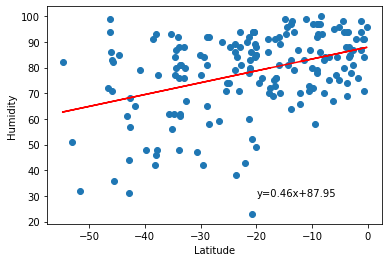

In [28]:
#Create dataframe for southern hemisphere
south_df = clean_city_data.loc[clean_city_data['Lat'] < 0]

#Get x,y scatterplot lists
lat_x = south_df['Lat']
humid_y = south_df['Humidity']

#build regression line
slope, y_int, rval, pval, std_err = st.linregress(lat_x,humid_y)

#Best fit line equation
fit = slope * south_df['Lat'] + y_int
line_eq = f'y={round(slope,2)}x+{round(y_int,2)}'

#print the r-value
print(f'The r-value is: {rval}')

#plot the line
plt.scatter(lat_x,humid_y)
plt.plot(south_df['Lat'],fit,'r-')
plt.annotate(f'{line_eq}', xy=(-20,30))
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.22916167721606898


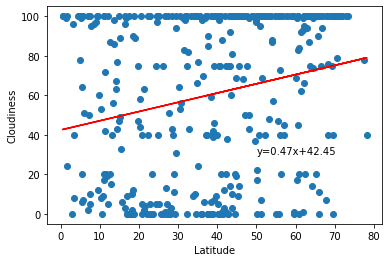

In [30]:
#Get x,y scatterplot lists
lat_x = north_df['Lat']
cloud_y = north_df['Cloudiness']

#build regression line
slope, y_int, rval, pval, std_err = st.linregress(lat_x,cloud_y)

#Best fit line equation
fit = slope * north_df['Lat'] + y_int
line_eq = f'y={round(slope,2)}x+{round(y_int,2)}'

#print the r-value
print(f'The r-value is: {rval}')

#plot the line
plt.scatter(lat_x,cloud_y)
plt.plot(north_df['Lat'],fit,'r-')
plt.annotate(f'{line_eq}', xy=(50,30))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-value is: 0.23302869482958907


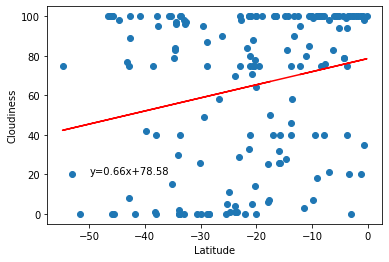

In [31]:
#Get x,y scatterplot lists
lat_x = south_df['Lat']
cloud_y = south_df['Cloudiness']

#build regression line
slope, y_int, rval, pval, std_err = st.linregress(lat_x,cloud_y)

#Best fit line equation
fit = slope * south_df['Lat'] + y_int
line_eq = f'y={round(slope,2)}x+{round(y_int,2)}'

#print the r-value
print(f'The r-value is: {rval}')

#plot the line
plt.scatter(lat_x,cloud_y)
plt.plot(south_df['Lat'],fit,'r-')
plt.annotate(f'{line_eq}', xy=(-50,20))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: 0.12074518650531475


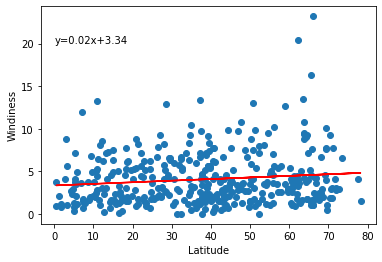

In [32]:
#Get x,y scatterplot lists
lat_x = north_df['Lat']
wind_y = north_df['Wind Speed']

#build regression line
slope, y_int, rval, pval, std_err = st.linregress(lat_x,wind_y)

#Best fit line equation
fit = slope * north_df['Lat'] + y_int
line_eq = f'y={round(slope,2)}x+{round(y_int,2)}'

#print the r-value
print(f'The r-value is: {rval}')

#plot the line
plt.scatter(lat_x,wind_y)
plt.plot(north_df['Lat'],fit,'r-')
plt.annotate(f'{line_eq}', xy=(0,20))
plt.xlabel('Latitude')
plt.ylabel('Windiness')
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-value is: -0.1748737592766915


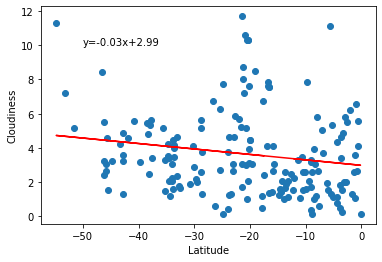

In [33]:
#Get x,y scatterplot lists
lat_x = south_df['Lat']
wind_y = south_df['Wind Speed']

#build regression line
slope, y_int, rval, pval, std_err = st.linregress(lat_x,wind_y)

#Best fit line equation
fit = slope * south_df['Lat'] + y_int
line_eq = f'y={round(slope,2)}x+{round(y_int,2)}'

#print the r-value
print(f'The r-value is: {rval}')

#plot the line
plt.scatter(lat_x,wind_y)
plt.plot(south_df['Lat'],fit,'r-')
plt.annotate(f'{line_eq}', xy=(-50,10))
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()